<center><h1>Tang_Lin_HW7</h1></center>

Name: Tang Lin
<br>
Github Username: MeLinOrDoreen
<br>
USC ID: 9012859074

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import hamming_loss, accuracy_score, silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

# to surpress warnings
import warnings
warnings.filterwarnings("ignore")

### (a) Download the Anuran Calls (MFCCs) Data Set

In [63]:
calls_df = pd.read_csv("../Data/Frogs_MFCCs.csv")
calls_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [64]:
# Choose 70% randomly as training set
training_df, test_df = train_test_split(calls_df, train_size=0.7, random_state=42)

In [65]:
# Check if it is correctly seperated
training_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407,Dendrobatidae,Ameerega,Ameeregatrivittata,13
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221,Hylidae,Hypsiboas,HypsiboasCinerascens,37
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656,Hylidae,Hypsiboas,HypsiboasCinerascens,37


### (b) Train a classifier for each label

#### (i) Research

1. Exact Match Ratio

To ignore partially correct (consider them incorrect) and extend the accuracy used in single label case for multi-label prediction.

2. Accuracy (Hamming Score)

Accuracy for each instance is defined as the proportion of the predicted correct labels to the total number (predicted and actual) of labels for that instance. Overall accuracy is the average across all instances. It is less ambiguously referred to as the Hamming score.

3. Hamming Loss

It reports how many times on average, the relevance of an example to a class label is incorrectly predicted. Therefore, hamming loss takes into account the prediction error (an incorrect label is predicted) and missing error (a relevant label not predicted), normalized over total number of classes and total number of examples. Ideally, we would expect the hamming loss to be 0, which would imply no error; practically the smaller the value of hamming loss, the better the performance of the learning algorithm.

#### (ii) Train a SVM for each of the labels

##### 1.Families

In [80]:
# Determine X and Y
X_train = training_df.iloc[:, :-4]
y_train_family = training_df.loc[:, "Family"]

X_test = test_df.iloc[:, :-4]
y_test_family = test_df.loc[:, "Family"]

## Encode the y
le = LabelEncoder()
y_train_family = le.fit_transform(y_train_family)
y_test_family = le.fit_transform(y_test_family)

# Standardize features if needed
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [81]:
# Train a SVM for "Family"
## Define a parameter grid
parm_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'gamma':['scale', 'auto'],
    'kernel': ['rbf']
}

## Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Define the grid
grid_family = GridSearchCV(SVC(decision_function_shape="ovr"), parm_grid, cv=cv, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)

## Fit the model for grid search
grid_family.fit(X_train, y_train_family)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[CV 6/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.609 total time=   4.7s
[CV 5/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.609 total time=   4.7s
[CV 4/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.609 total time=   4.7s
[CV 2/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.611 total time=   4.7s
[CV 3/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.611 total time=   4.8s
[CV 7/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.610 total time=   4.9s
[CV 8/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.610 total time=   5.0s
[CV 1/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.611 total time=   5.1s
[CV 10/10] END C=0.001, gamma=scale, kernel=rbf;, score=0.610 total time=   3.9s
[CV 1/10] END ..C=0.001, gamma=auto, kernel=rbf;, score=0.611 total time=   4.0s
[CV 9/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.610 total time=   4.1s
[CV 2/10] END ..C=0.001, gamma=auto, kernel=rbf;, score=0.611 total time=   4.0s
[CV 5/10] END ..C=0.001, gam

In [82]:
# Print the results
print("Best parameters found: ", grid_family.best_params_)

Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


##### 2. Genus

In [71]:
# Determine X and Y
X_train = training_df.iloc[:, :-4]
y_train_genus = training_df.loc[:, "Genus"]

X_test = test_df.iloc[:, :-4]
y_test_genus = test_df.loc[:, "Genus"]

## Encode the y
le = LabelEncoder()
y_train_genus = le.fit_transform(y_train_genus)
y_test_genus = le.fit_transform(y_test_genus)

# Standardize features if needed
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [72]:
# Train a SVM for "Genus"
## Define a parameter grid
parm_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'gamma':['scale', 'auto'],
    'kernel': ['rbf']
}

## Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Define the grid
grid_genus = GridSearchCV(SVC(decision_function_shape="ovr"), parm_grid, cv=cv, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)

## Fit the model for grid search
grid_genus.fit(X_train, y_train_genus)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 4/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.575 total time=   2.0s
[CV 2/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.575 total time=   2.0s
[CV 3/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.575 total time=   2.0s
[CV 5/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.575 total time=   2.1s
[CV 1/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.575 total time=   2.2s
[CV 7/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.577 total time=   2.0s
[CV 6/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.575 total time=   2.2s
[CV 8/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.577 total time=   2.2s
[CV 10/10] END C=0.001, gamma=scale, kernel=rbf;, score=0.575 total time=   2.7s
[CV 2/10] END ..C=0.001, gamma=auto, kernel=rbf;, score=0.575 total time=   2.7s
[CV 9/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.577 total time=   2.9s
[CV 5/10] END ..C=0.001, gamma=auto, kernel=rb

In [73]:
# Print the results
print("Best parameters found: ", grid_genus.best_params_)

Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


##### 3. Species

In [74]:
# Determine X and Y
X_train = training_df.iloc[:, :-4]
y_train_species = training_df.loc[:, "Species"]

X_test = test_df.iloc[:, :-4]
y_test_species = test_df.loc[:, "Species"]

## Encode the y
le = LabelEncoder()
y_train_species = le.fit_transform(y_train_species)
y_test_species = le.fit_transform(y_test_species)

## Standardize features if needed
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [75]:
# Train a SVM for "Species"
## Define a parameter grid
parm_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'gamma':['scale', 'auto'],
    'kernel': ['rbf']
}

## Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Define the grid
grid_species = GridSearchCV(SVC(decision_function_shape="ovr"), parm_grid, cv=cv, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)

## Fit the model for grid search
grid_species.fit(X_train, y_train_species)



Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 7/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.487 total time=   3.6s
[CV 8/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.485 total time=   4.0s
[CV 6/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.486 total time=   4.3s
[CV 3/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.486 total time=   4.4s
[CV 2/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.486 total time=   4.6s
[CV 5/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.486 total time=   4.7s
[CV 4/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.486 total time=   5.1s
[CV 1/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.486 total time=   6.2s
[CV 9/10] END .C=0.001, gamma=scale, kernel=rbf;, score=0.485 total time=   7.1s
[CV 1/10] END ..C=0.001, gamma=auto, kernel=rbf;, score=0.486 total time=   6.3s
[CV 10/10] END C=0.001, gamma=scale, kernel=rbf;, score=0.485 total time=   7.4s
[CV 2/10] END ..C=0.001, gamma=auto, kernel=rb

In [76]:
## Print the results
print("Best parameters found: ", grid_species.best_params_)

Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


##### Calculate the hamming score/loss and exact match

In [108]:
# Aggregate all the predicted values and true values
# Training set
y_train_true_labels = np.vstack((y_train_family, y_train_genus, y_train_species)).T
#y_train_true_labels = pd.DataFrame(y_train_true_labels, columns= ["Family", "Genus", "Species"])

y_train_pred_family = grid_family.predict(X_train)
y_train_pred_genus = grid_genus.predict(X_train)
y_train_pred_species = grid_species.predict(X_train)

y_train_pred_labels = np.vstack((y_train_pred_family, y_train_pred_genus, y_train_pred_species)).T
#y_train_pred_labels = pd.DataFrame(y_train_pred_labels, columns= ["Family", "Genus", "Species"])

# Test set
y_test_true_labels = np.vstack((y_test_family, y_test_genus, y_test_species)).T
#y_test_true_labels = pd.DataFrame(y_test_true_labels, columns= ["Family", "Genus", "Species"])

y_test_pred_family = grid_family.predict(X_test)
y_test_pred_genus = grid_genus.predict(X_test)
y_test_pred_species = grid_species.predict(X_test)

y_test_pred_labels = np.vstack((y_test_pred_family, y_test_pred_genus, y_test_pred_species)).T
#y_test_pred_labels = pd.DataFrame(y_test_pred_labels, columns= ["Family", "Genus", "Species"])

In [111]:
y_train_pred_labels

array([[3, 0, 1],
       [1, 1, 2],
       [2, 3, 4],
       ...,
       [2, 3, 4],
       [2, 3, 4],
       [1, 1, 2]])

In [112]:
# Hamming Loss definition
def Hamming_Loss(y_true, y_pred):
    temp=0
    for i in range(y_true.shape[0]):
        temp += np.size(y_true[i] == y_pred[i]) - np.count_nonzero(y_true[i] == y_pred[i])
    return temp/(y_true.shape[0] * y_true.shape[1])

# Accuracy definition
def Accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[0]

In [117]:
# Calculate Hamming loss, Hamming score, and exact match
hamming_loss_value_train = Hamming_Loss(y_train_true_labels, y_train_pred_labels)
hamming_score_train = 1 - hamming_loss_value_train
exact_match_train = Accuracy(y_train_true_labels, y_train_true_labels)

hamming_loss_value_test = Hamming_Loss(y_test_true_labels, y_test_pred_labels)
hamming_score_test = 1 - hamming_loss_value_test
exact_match_test = Accuracy(y_test_true_labels, y_test_true_labels)

results = pd.DataFrame({
    "Hamming Loss": [hamming_loss_value_train, hamming_loss_value_test],
    "Hamming Score": [hamming_score_train, hamming_score_test],
    "Exact Match": [exact_match_train, exact_match_test]
}, index= ["Training Set", "Test Set"])

results

,Hamming Loss,Hamming Score,Exact Match
Training Set,0.003508,0.996492,1.0
Test Set,0.011888,0.988112,1.0


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [118]:
##### 1. Family
# Determine X and Y
X_train = training_df.iloc[:, :-4]
y_train_family = training_df.loc[:, "Family"]

X_test = test_df.iloc[:, :-4]
y_test_family = test_df.loc[:, "Family"]

## Encode the y
le = LabelEncoder()
y_train_family = le.fit_transform(y_train_family)
y_test_family = le.fit_transform(y_test_family)

# Standardize features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Train a SVM for "Family"
## Define a parameter grid
parm_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10]
}

## Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Define the grid
grid_family = GridSearchCV(LinearSVC(penalty = "l1",dual = False, multi_class="ovr"), parm_grid, cv=cv, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)

## Fit the model for grid search
grid_family.fit(X_train, y_train_family)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 8/10] END ..........................C=0.001;, score=0.855 total time=   0.1s
[CV 2/10] END ..........................C=0.001;, score=0.861 total time=   0.1s
[CV 7/10] END ..........................C=0.001;, score=0.855 total time=   0.1s
[CV 1/10] END ..........................C=0.001;, score=0.867 total time=   0.2s
[CV 3/10] END ..........................C=0.001;, score=0.859 total time=   0.2s
[CV 6/10] END ..........................C=0.001;, score=0.845 total time=   0.2s
[CV 4/10] END ..........................C=0.001;, score=0.849 total time=   0.2s
[CV 5/10] END ..........................C=0.001;, score=0.849 total time=   0.1s
[CV 9/10] END ..........................C=0.001;, score=0.827 total time=   0.2s
[CV 10/10] END .........................C=0.001;, score=0.855 total time=   0.3s
[CV 4/10] END ...........................C=0.01;, score=0.933 total time=   0.7s
[CV 2/10] END ...........................C=0.01;

/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END ............................C=0.1;, score=0.948 total time=   4.0s
[CV 8/10] END ............................C=0.1;, score=0.932 total time=   3.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END ...........................C=0.1;, score=0.946 total time=   3.6s
[CV 9/10] END ............................C=0.1;, score=0.924 total time=   4.3s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ..............................C=1;, score=0.942 total time=   5.2s
[CV 5/10] END ..............................C=1;, score=0.942 total time=   5.3s
[CV 1/10] END ..............................C=1;, score=0.938 total time=   5.9s
[CV 6/10] END ..............................C=1;, score=0.937 total time=   5.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END ..............................C=1;, score=0.954 total time=   6.0s
[CV 4/10] END ..............................C=1;, score=0.935 total time=   5.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ..............................C=1;, score=0.946 total time=   4.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END ..............................C=1;, score=0.940 total time=   4.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ..............................C=1;, score=0.924 total time=   4.3s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END .............................C=10;, score=0.938 total time=   4.6s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END .............................C=1;, score=0.948 total time=   5.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END .............................C=10;, score=0.952 total time=   5.5s
[CV 3/10] END .............................C=10;, score=0.942 total time=   5.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END .............................C=10;, score=0.935 total time=   5.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END .............................C=10;, score=0.942 total time=   4.8s
[CV 6/10] END .............................C=10;, score=0.938 total time=   4.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END .............................C=10;, score=0.948 total time=   3.5s
[CV 8/10] END .............................C=10;, score=0.942 total time=   3.3s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END .............................C=10;, score=0.924 total time=   3.5s
[CV 10/10] END ............................C=10;, score=0.948 total time=   3.1s
Best parameters found:  {'C': 10}


In [119]:
# Print the results
print("Best parameters found: ", grid_family.best_params_)


Best parameters found:  {'C': 10}


In [120]:
##### 2. Genus

# Determine X and Y
X_train = training_df.iloc[:, :-4]
y_train_genus = training_df.loc[:, "Genus"]

X_test = test_df.iloc[:, :-4]
y_test_genus = test_df.loc[:, "Genus"]

## Encode the y
le = LabelEncoder()
y_train_genus = le.fit_transform(y_train_genus)
y_test_genus = le.fit_transform(y_test_genus)

# Standardize features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Train a SVM for "Genus"
## Define a parameter grid
parm_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10]
}

## Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Define the grid
grid_genus = GridSearchCV(LinearSVC(penalty = "l1",dual = False, multi_class="ovr"), parm_grid, cv=cv, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)

## Fit the model for grid search
grid_genus.fit(X_train, y_train_genus)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END ..........................C=0.001;, score=0.821 total time=   0.1s
[CV 2/10] END ..........................C=0.001;, score=0.833 total time=   0.1s
[CV 3/10] END ..........................C=0.001;, score=0.819 total time=   0.1s
[CV 4/10] END ..........................C=0.001;, score=0.833 total time=   0.1s
[CV 5/10] END ..........................C=0.001;, score=0.821 total time=   0.1s
[CV 6/10] END ..........................C=0.001;, score=0.823 total time=   0.0s
[CV 7/10] END ..........................C=0.001;, score=0.825 total time=   0.1s
[CV 9/10] END ..........................C=0.001;, score=0.819 total time=   0.0s
[CV 8/10] END ..........................C=0.001;, score=0.815 total time=   0.0s
[CV 10/10] END .........................C=0.001;, score=0.823 total time=   0.0s
[CV 3/10] END ...........................C=0.01;, score=0.923 total time=   0.3s
[CV 5/10] END ...........................C=0.01;

/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ............................C=0.1;, score=0.948 total time=   2.4s
[CV 7/10] END ............................C=0.1;, score=0.938 total time=   2.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END ............................C=0.1;, score=0.937 total time=   2.7s
[CV 9/10] END ............................C=0.1;, score=0.948 total time=   2.7s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END ..............................C=1;, score=0.954 total time=   4.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ..............................C=1;, score=0.954 total time=   4.7s
[CV 4/10] END ............................C=0.1;, score=0.940 total time=   3.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END ..............................C=1;, score=0.938 total time=   5.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END ............................C=0.1;, score=0.944 total time=   4.7s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END ............................C=0.1;, score=0.935 total time=   5.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END ...........................C=0.1;, score=0.944 total time=   5.7s
[CV 2/10] END ............................C=0.1;, score=0.940 total time=   5.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END ..............................C=1;, score=0.942 total time=   9.4s
[CV 6/10] END ..............................C=1;, score=0.944 total time=  10.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ..............................C=1;, score=0.952 total time=   9.1s
[CV 2/10] END ..............................C=1;, score=0.952 total time=   9.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ..............................C=1;, score=0.952 total time=   8.6s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END .............................C=10;, score=0.940 total time=   9.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END .............................C=10;, score=0.956 total time=   9.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END .............................C=10;, score=0.956 total time=   9.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END .............................C=10;, score=0.956 total time=   8.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END ..............................C=1;, score=0.952 total time=   8.1s
[CV 7/10] END .............................C=10;, score=0.950 total time=   8.8s
[CV 10/10] END ............................C=10;, score=0.958 total time=   8.1s
[CV 10/10] END .............................C=1;, score=0.954 total time=   7.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END .............................C=10;, score=0.946 total time=   6.7s
[CV 2/10] END .............................C=10;, score=0.954 total time=   7.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END .............................C=10;, score=0.944 total time=   6.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END .............................C=10;, score=0.952 total time=   3.1s


In [121]:
# Print the results
print("Best parameters found: ", grid_genus.best_params_)

Best parameters found:  {'C': 10}


In [122]:
##### 3. Species
# Determine X and Y
X_train = training_df.iloc[:, :-4]
y_train_species = training_df.loc[:, "Species"]

X_test = test_df.iloc[:, :-4]
y_test_species = test_df.loc[:, "Species"]

## Encode the y
le = LabelEncoder()
y_train_species = le.fit_transform(y_train_species)
y_test_species = le.fit_transform(y_test_species)

## Standardize features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Train a SVM for "Species"
## Define a parameter grid
parm_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10]
}

## Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Define the grid
grid_species = GridSearchCV(LinearSVC(penalty = "l1",dual = False, multi_class="ovr"), parm_grid, cv=cv, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)

## Fit the model for grid search
grid_species.fit(X_train, y_train_species)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END ..........................C=0.001;, score=0.798 total time=   0.1s
[CV 2/10] END ..........................C=0.001;, score=0.776 total time=   0.1s
[CV 3/10] END ..........................C=0.001;, score=0.800 total time=   0.1s
[CV 4/10] END ..........................C=0.001;, score=0.796 total time=   0.1s
[CV 5/10] END ..........................C=0.001;, score=0.768 total time=   0.1s
[CV 6/10] END ..........................C=0.001;, score=0.784 total time=   0.1s
[CV 8/10] END ..........................C=0.001;, score=0.781 total time=   0.1s
[CV 7/10] END ..........................C=0.001;, score=0.785 total time=   0.1s
[CV 9/10] END ..........................C=0.001;, score=0.787 total time=   0.1s
[CV 10/10] END .........................C=0.001;, score=0.795 total time=   0.1s
[CV 5/10] END ...........................C=0.01;, score=0.917 total time=   0.4s
[CV 7/10] END ...........................C=0.01;

/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ............................C=0.1;, score=0.962 total time=   5.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END ............................C=0.1;, score=0.952 total time=   5.7s
[CV 1/10] END ............................C=0.1;, score=0.952 total time=   5.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ............................C=0.1;, score=0.933 total time=   6.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ............................C=0.1;, score=0.936 total time=   6.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ..............................C=1;, score=0.946 total time=   8.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END ..............................C=1;, score=0.962 total time=   7.8s
[CV 1/10] END ..............................C=1;, score=0.954 total time=   9.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END ...........................C=0.1;, score=0.944 total time=   4.7s
[CV 6/10] END ............................C=0.1;, score=0.952 total time=   4.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END ............................C=0.1;, score=0.938 total time=   4.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END ............................C=0.1;, score=0.958 total time=   4.6s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END ............................C=0.1;, score=0.970 total time=   5.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END ..............................C=1;, score=0.974 total time=   7.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END ..............................C=1;, score=0.970 total time=   7.1s
[CV 9/10] END ..............................C=1;, score=0.972 total time=   6.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ..............................C=1;, score=0.946 total time=   7.2s
[CV 2/10] END ..............................C=1;, score=0.952 total time=   7.7s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END .............................C=10;, score=0.956 total time=   6.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END .............................C=10;, score=0.962 total time=   6.7s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END .............................C=10;, score=0.952 total time=   7.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END .............................C=10;, score=0.946 total time=   6.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END .............................C=1;, score=0.956 total time=   6.2s
[CV 9/10] END .............................C=10;, score=0.970 total time=   6.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END ............................C=10;, score=0.954 total time=   6.4s
[CV 8/10] END ..............................C=1;, score=0.966 total time=   6.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END .............................C=10;, score=0.954 total time=   6.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END .............................C=10;, score=0.970 total time=   6.3s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END .............................C=10;, score=0.972 total time=   6.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END .............................C=10;, score=0.968 total time=   3.3s


In [123]:
## Print the results
print("Best parameters found: ", grid_species.best_params_)

Best parameters found:  {'C': 10}


In [124]:
##### Calculate the hamming score/loss and exact match
y_test_pred_labels
# Aggregate all the predicted values and true values
# Training set
y_train_true_labels = np.vstack((y_train_family, y_train_genus, y_train_species)).T
#y_train_true_labels = pd.DataFrame(y_train_true_labels, columns= ["Family", "Genus", "Species"])

y_train_pred_family = grid_family.predict(X_train)
y_train_pred_genus = grid_genus.predict(X_train)
y_train_pred_species = grid_species.predict(X_train)

y_train_pred_labels = np.vstack((y_train_pred_family, y_train_pred_genus, y_train_pred_species)).T
#y_train_pred_labels = pd.DataFrame(y_train_pred_labels, columns= ["Family", "Genus", "Species"])

# Test set
y_test_true_labels = np.vstack((y_test_family, y_test_genus, y_test_species)).T
#y_test_true_labels = pd.DataFrame(y_test_true_labels, columns= ["Family", "Genus", "Species"])

y_test_pred_family = grid_family.predict(X_test)
y_test_pred_genus = grid_genus.predict(X_test)
y_test_pred_species = grid_species.predict(X_test)

y_test_pred_labels = np.vstack((y_test_pred_family, y_test_pred_genus, y_test_pred_species)).T
#y_test_pred_labels = pd.DataFrame(y_test_pred_labels, columns= ["Family", "Genus", "Species"])

In [125]:
# Calculate Hamming loss, Hamming score, and exact match
hamming_loss_value_train = Hamming_Loss(y_train_true_labels, y_train_pred_labels)
hamming_score_train = 1 - hamming_loss_value_train
exact_match_train = Accuracy(y_train_true_labels, y_train_true_labels)

hamming_loss_value_test = Hamming_Loss(y_test_true_labels, y_test_pred_labels)
hamming_score_test = 1 - hamming_loss_value_test
exact_match_test = Accuracy(y_test_true_labels, y_test_true_labels)

results = pd.DataFrame({
    "Hamming Loss": [hamming_loss_value_train, hamming_loss_value_test],
    "Hamming Score": [hamming_score_train, hamming_score_test],
    "Exact Match": [exact_match_train, exact_match_test]
}, index= ["Training Set", "Test Set"])

results

,Hamming Loss,Hamming Score,Exact Match
Training Set,0.045208,0.954792,1.0
Test Set,0.058669,0.941331,1.0


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [128]:
##### 1. Family
# Determine X and Y
X_train = training_df.iloc[:, :-4]
y_train_family = training_df.loc[:, "Family"]

X_test = test_df.iloc[:, :-4]
y_test_family = test_df.loc[:, "Family"]

## Encode the y
le = LabelEncoder()
y_train_family = le.fit_transform(y_train_family)
y_test_family = le.fit_transform(y_test_family)

# Standardize features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train, y_train_family = smote.fit_resample(X_train, y_train_family)

# Fit a SVC with linear kernel
## Define a parameter grid
parm_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10]
}

## Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Define the grid
grid_family = GridSearchCV(LinearSVC(penalty = "l1",dual = False, multi_class="ovr"), parm_grid, cv=cv, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)

## Fit the model for grid search
grid_family.fit(X_train, y_train_family)

# Print the results
print("Best parameters found: ", grid_family.best_params_)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 5/10] END ..........................C=0.001;, score=0.894 total time=   0.5s
[CV 2/10] END ..........................C=0.001;, score=0.889 total time=   0.6s
[CV 6/10] END ..........................C=0.001;, score=0.887 total time=   0.6s
[CV 4/10] END ..........................C=0.001;, score=0.877 total time=   0.6s
[CV 3/10] END ..........................C=0.001;, score=0.891 total time=   0.7s
[CV 1/10] END ..........................C=0.001;, score=0.904 total time=   0.8s
[CV 7/10] END ..........................C=0.001;, score=0.870 total time=   0.8s
[CV 8/10] END ..........................C=0.001;, score=0.889 total time=   1.0s
[CV 9/10] END ..........................C=0.001;, score=0.876 total time=   0.5s
[CV 10/10] END .........................C=0.001;, score=0.889 total time=   0.5s
[CV 2/10] END ...........................C=0.01;, score=0.933 total time=   3.5s
[CV 3/10] END ...........................C=0.01;

/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END ............................C=0.1;, score=0.939 total time=  10.8s
[CV 2/10] END ............................C=0.1;, score=0.946 total time=  11.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END ............................C=0.1;, score=0.953 total time=  12.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ............................C=0.1;, score=0.962 total time=  12.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END ............................C=0.1;, score=0.958 total time=  12.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END ............................C=0.1;, score=0.946 total time=  12.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ............................C=0.1;, score=0.946 total time=  11.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END ............................C=0.1;, score=0.957 total time=  12.7s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ............................C=0.1;, score=0.936 total time=  13.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END ...........................C=0.1;, score=0.959 total time=  13.3s
[CV 1/10] END ..............................C=1;, score=0.954 total time=  12.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END ..............................C=1;, score=0.951 total time=  13.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ..............................C=1;, score=0.960 total time=  12.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END ..............................C=1;, score=0.940 total time=  12.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END ..............................C=1;, score=0.959 total time=  12.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END ..............................C=1;, score=0.946 total time=  13.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ..............................C=1;, score=0.936 total time=  11.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ..............................C=1;, score=0.951 total time=  13.0s
[CV 10/10] END .............................C=1;, score=0.958 total time=  11.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END ..............................C=1;, score=0.959 total time=  12.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END .............................C=10;, score=0.954 total time=  13.7s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END .............................C=10;, score=0.951 total time=  13.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END .............................C=10;, score=0.960 total time=  13.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END .............................C=10;, score=0.941 total time=  12.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END .............................C=10;, score=0.959 total time=  10.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END .............................C=10;, score=0.959 total time=  10.4s
[CV 6/10] END .............................C=10;, score=0.946 total time=  10.6s
[CV 7/10] END .............................C=10;, score=0.951 total time=  10.6s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END .............................C=10;, score=0.936 total time=   9.5s
[CV 10/10] END ............................C=10;, score=0.959 total time=   9.2s
Best parameters found:  {'C': 10}


In [129]:
##### 2. Genus

# Determine X and Y
X_train = training_df.iloc[:, :-4]
y_train_genus = training_df.loc[:, "Genus"]

X_test = test_df.iloc[:, :-4]
y_test_genus = test_df.loc[:, "Genus"]

## Encode the y
le = LabelEncoder()
y_train_genus = le.fit_transform(y_train_genus)
y_test_genus = le.fit_transform(y_test_genus)

# Standardize features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train, y_train_genus = smote.fit_resample(X_train, y_train_genus)

# Fit a SVC with linear kernel
## Define a parameter grid
parm_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10]
}

## Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Define the grid
grid_genus = GridSearchCV(LinearSVC(penalty = "l1",dual = False, multi_class="ovr"), parm_grid, cv=cv, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)

## Fit the model for grid search
grid_genus.fit(X_train, y_train_genus)

# Print the results
print("Best parameters found: ", grid_genus.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 6/10] END ..........................C=0.001;, score=0.889 total time=   3.1s
[CV 3/10] END ..........................C=0.001;, score=0.894 total time=   3.3s
[CV 2/10] END ..........................C=0.001;, score=0.891 total time=   3.4s
[CV 1/10] END ..........................C=0.001;, score=0.887 total time=   3.5s
[CV 5/10] END ..........................C=0.001;, score=0.893 total time=   3.6s
[CV 4/10] END ..........................C=0.001;, score=0.890 total time=   3.8s
[CV 7/10] END ..........................C=0.001;, score=0.899 total time=   3.8s
[CV 8/10] END ..........................C=0.001;, score=0.878 total time=   3.9s
[CV 10/10] END .........................C=0.001;, score=0.889 total time=   3.4s
[CV 9/10] END ..........................C=0.001;, score=0.896 total time=   4.2s
[CV 2/10] END ...........................C=0.01;, score=0.942 total time=  18.6s
[CV 5/10] END ...........................C=0.01;

/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ...........................C=0.01;, score=0.943 total time=  22.8s
[CV 6/10] END ...........................C=0.01;, score=0.949 total time=  23.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END ...........................C=0.01;, score=0.934 total time=  25.1s
[CV 8/10] END ...........................C=0.01;, score=0.937 total time=  21.6s
[CV 7/10] END ...........................C=0.01;, score=0.948 total time=  22.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ...........................C=0.01;, score=0.942 total time=  21.5s
[CV 10/10] END ..........................C=0.01;, score=0.943 total time=  21.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END ............................C=0.1;, score=0.958 total time=  34.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ............................C=0.1;, score=0.959 total time=  35.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END ............................C=0.1;, score=0.952 total time=  39.3s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END ............................C=0.1;, score=0.955 total time=  35.7s
[CV 4/10] END ............................C=0.1;, score=0.959 total time=  36.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END ............................C=0.1;, score=0.964 total time=  37.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ............................C=0.1;, score=0.959 total time=  38.6s
[CV 8/10] END ............................C=0.1;, score=0.949 total time=  37.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ............................C=0.1;, score=0.953 total time=  37.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END ...........................C=0.1;, score=0.959 total time=  37.7s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END ..............................C=1;, score=0.959 total time=  41.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END ..............................C=1;, score=0.960 total time=  42.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ..............................C=1;, score=0.960 total time=  43.7s
[CV 4/10] END ..............................C=1;, score=0.961 total time=  42.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END ..............................C=1;, score=0.967 total time=  41.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END ..............................C=1;, score=0.959 total time=  41.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ..............................C=1;, score=0.966 total time=  40.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END ..............................C=1;, score=0.953 total time=  41.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ..............................C=1;, score=0.956 total time=  42.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END .............................C=10;, score=0.959 total time=  41.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END .............................C=1;, score=0.961 total time=  43.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END .............................C=10;, score=0.961 total time=  41.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END .............................C=10;, score=0.960 total time=  41.6s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END .............................C=10;, score=0.962 total time=  41.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END .............................C=10;, score=0.959 total time=  37.7s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END .............................C=10;, score=0.968 total time=  37.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END .............................C=10;, score=0.966 total time=  34.7s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END .............................C=10;, score=0.953 total time=  33.3s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END .............................C=10;, score=0.956 total time=  32.9s
[CV 10/10] END ............................C=10;, score=0.962 total time=  32.7s
Best parameters found:  {'C': 10}


In [127]:
##### 3. Species
# Determine X and Y
X_train = training_df.iloc[:, :-4]
y_train_species = training_df.loc[:, "Species"]

X_test = test_df.iloc[:, :-4]
y_test_species = test_df.loc[:, "Species"]

## Encode the y
le = LabelEncoder()
y_train_species = le.fit_transform(y_train_species)
y_test_species = le.fit_transform(y_test_species)

## Standardize features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train, y_train_species = smote.fit_resample(X_train, y_train_species)

# Fit a SVC with linear kernel
## Define a parameter grid
parm_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10]
}

## Define StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Define the grid
grid_species = GridSearchCV(LinearSVC(penalty = "l1",dual = False, multi_class="ovr"), parm_grid, cv=cv, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)

## Fit the model for grid search
grid_species.fit(X_train, y_train_species)

# Print the results
print("Best parameters found: ", grid_species.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 8/10] END ..........................C=0.001;, score=0.888 total time=   6.3s
[CV 1/10] END ..........................C=0.001;, score=0.881 total time=   6.5s
[CV 6/10] END ..........................C=0.001;, score=0.896 total time=   7.0s
[CV 4/10] END ..........................C=0.001;, score=0.905 total time=   7.5s
[CV 3/10] END ..........................C=0.001;, score=0.893 total time=   7.6s
[CV 5/10] END ..........................C=0.001;, score=0.899 total time=   7.7s
[CV 2/10] END ..........................C=0.001;, score=0.897 total time=   7.7s
[CV 7/10] END ..........................C=0.001;, score=0.896 total time=   8.0s
[CV 9/10] END ..........................C=0.001;, score=0.896 total time=  11.7s
[CV 10/10] END .........................C=0.001;, score=0.893 total time=  12.0s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END ...........................C=0.01;, score=0.941 total time=  43.6s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END ...........................C=0.01;, score=0.943 total time=  43.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ...........................C=0.01;, score=0.940 total time=  45.1s
[CV 2/10] END ...........................C=0.01;, score=0.933 total time=  45.3s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END ...........................C=0.01;, score=0.946 total time=  47.1s
[CV 5/10] END ...........................C=0.01;, score=0.951 total time=  47.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ...........................C=0.01;, score=0.944 total time=  38.6s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END ...........................C=0.01;, score=0.938 total time=  41.0s
[CV 10/10] END ..........................C=0.01;, score=0.943 total time=  38.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ...........................C=0.01;, score=0.944 total time=  40.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ............................C=0.1;, score=0.955 total time=  47.7s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END ............................C=0.1;, score=0.958 total time=  50.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END ............................C=0.1;, score=0.962 total time=  50.5s
[CV 2/10] END ............................C=0.1;, score=0.955 total time=  52.6s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END ............................C=0.1;, score=0.965 total time=  47.3s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END ............................C=0.1;, score=0.964 total time=  53.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ............................C=0.1;, score=0.959 total time=  49.2s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END ............................C=0.1;, score=0.959 total time=  51.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ............................C=0.1;, score=0.957 total time=  46.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END ...........................C=0.1;, score=0.961 total time=  47.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END ..............................C=1;, score=0.959 total time=  52.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END ..............................C=1;, score=0.959 total time=  54.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END ..............................C=1;, score=0.963 total time=  55.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END ..............................C=1;, score=0.964 total time=  53.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END ..............................C=1;, score=0.966 total time=  56.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 6/10] END ..............................C=1;, score=0.966 total time=  54.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END ..............................C=1;, score=0.964 total time=  56.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 8/10] END ..............................C=1;, score=0.963 total time=  55.5s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END ..............................C=1;, score=0.961 total time=  55.9s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 10/10] END .............................C=1;, score=0.964 total time=  56.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/10] END .............................C=10;, score=0.964 total time=  57.4s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/10] END .............................C=10;, score=0.959 total time=  56.1s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/10] END .............................C=10;, score=0.960 total time= 1.1min


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/10] END .............................C=10;, score=0.964 total time= 1.1min


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/10] END .............................C=10;, score=0.966 total time= 1.0min
[CV 6/10] END .............................C=10;, score=0.966 total time= 1.0min


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 7/10] END .............................C=10;, score=0.964 total time=  57.6s
[CV 8/10] END .............................C=10;, score=0.962 total time=  56.8s


/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 9/10] END .............................C=10;, score=0.961 total time=  56.1s
[CV 10/10] END ............................C=10;, score=0.964 total time=  54.4s
Best parameters found:  {'C': 1}


In [132]:
##### Calculate the hamming score/loss and exact match
# Aggregate all the predicted values and true values
# Training set
#y_train_true_labels = np.vstack((y_train_family, y_train_genus, y_train_species)).T
#y_train_true_labels = pd.DataFrame(y_train_true_labels, columns= ["Family", "Genus", "Species"])

# y_train_pred_family = grid_family.predict(X_train)
# y_train_pred_genus = grid_genus.predict(X_train)
# y_train_pred_species = grid_species.predict(X_train)

# y_train_pred_labels = np.vstack((y_train_pred_family, y_train_pred_genus, y_train_pred_species)).T
#y_train_pred_labels = pd.DataFrame(y_train_pred_labels, columns= ["Family", "Genus", "Species"])

# Test set
y_test_true_labels = np.vstack((y_test_family, y_test_genus, y_test_species)).T
#y_test_true_labels = pd.DataFrame(y_test_true_labels, columns= ["Family", "Genus", "Species"])

y_test_pred_family = grid_family.predict(X_test)
y_test_pred_genus = grid_genus.predict(X_test)
y_test_pred_species = grid_species.predict(X_test)

y_test_pred_labels = np.vstack((y_test_pred_family, y_test_pred_genus, y_test_pred_species)).T
#y_test_pred_labels = pd.DataFrame(y_test_pred_labels, columns= ["Family", "Genus", "Species"])

In [131]:
# Calculate Hamming loss, Hamming score, and exact match
# hamming_loss_value_train = Hamming_Loss(y_train_true_labels, y_train_pred_labels)
# hamming_score_train = 1 - hamming_loss_value_train
# exact_match_train = Accuracy(y_train_true_labels, y_train_true_labels)

hamming_loss_value_test = Hamming_Loss(y_test_true_labels, y_test_pred_labels)
hamming_score_test = 1 - hamming_loss_value_test
exact_match_test = Accuracy(y_test_true_labels, y_test_true_labels)

results = pd.DataFrame({
    "Hamming Loss": [hamming_loss_value_test],
    "Hamming Score": [hamming_score_test],
    "Exact Match": [exact_match_test]
}, index= ["Test Set"])

results

,Hamming Loss,Hamming Score,Exact Match
Test Set,0.058669,0.941331,1.0


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [223]:
# Standardize the features
X = calls_df.iloc[:, :-5]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose the range of k values
k_values = range(1, 51)

In [224]:
# Fit k-means clustering for each k
inertia = [] #within-cluster sum of squares

silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Append the inertia (sum of squared distances)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score for each k
    if k > 1:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

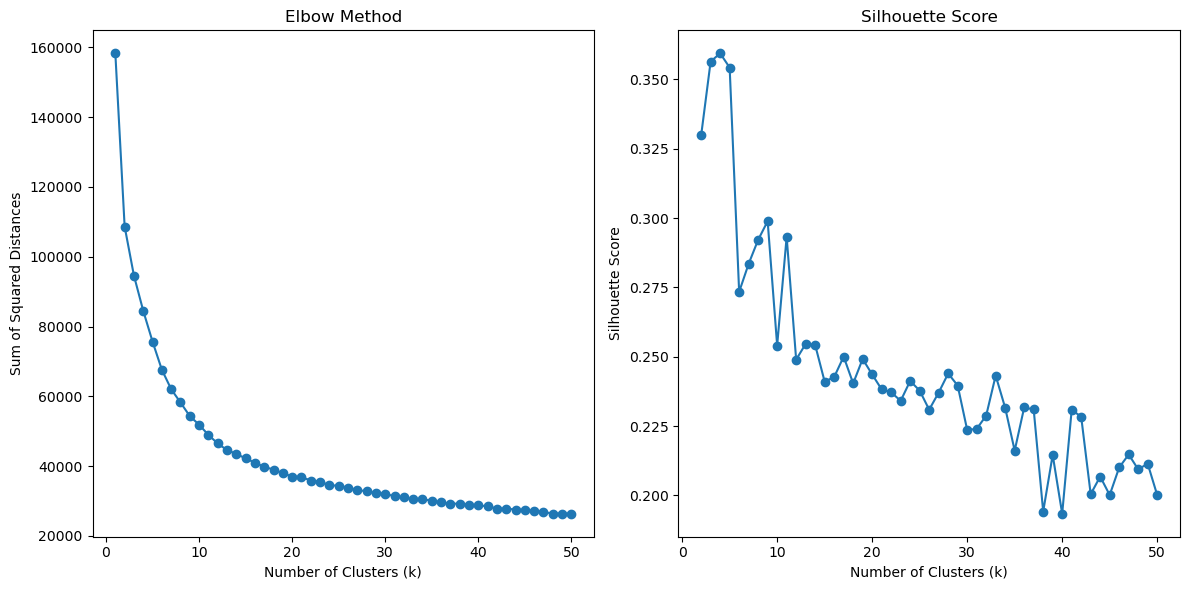

In [225]:
# Plot the Elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### (b) Determine which family is the majority

In [226]:
# Choose the optimal k based on the Silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because we started from k=2

# Cluster the data with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans_optimal.fit_predict(X)

In [227]:
optimal_k

4

In [154]:
true_labels = calls_df.iloc[:, -4: -1]
true_labels

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [208]:
# Add cluster labels to the true labels DataFrame
true_labels = calls_df
true_labels['Cluster'] = labels

# Determine the majority labels in each cluster
majority_labels = true_labels.groupby('Cluster').agg(lambda x: x.value_counts().idxmax())[['Family', 'Genus', 'Species']]

# Display the majority labels
print(majority_labels)

                  Family      Genus                 Species
Cluster                                                    
0                Hylidae  Hypsiboas       HypsiboasCordobae
1        Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2                Hylidae  Hypsiboas    HypsiboasCinerascens
3        Leptodactylidae  Adenomera          AdenomeraAndre


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [214]:
# Calculate Hamming metrics
hamming_distances = []
hamming_scores = []
hamming_losses = []

for cluster in range(optimal_k):
    cluster_labels = majority_labels.loc[cluster, ['Family', 'Genus', 'Species']]
    true_cluster_labels = true_labels[true_labels['Cluster'] == cluster][['Family', 'Genus', 'Species']]

    # Resize the dataframe
    cluster_labels = np.tile(cluster_labels.values, (len(true_cluster_labels), 1))
    cluster_labels = cluster_labels.reshape(true_cluster_labels.shape)
    cluster_labels = pd.DataFrame(cluster_labels, columns=['Family', 'Genus', 'Species'])

    # Reset indexes for comparison
    cluster_labels = cluster_labels.reset_index(drop=True)
    true_cluster_labels = true_cluster_labels.reset_index(drop=True)

    # print(cluster_labels)
    # print(true_cluster_labels)
    
    for label in ['Family', 'Genus', 'Species']:
        hamming_distance = np.sum(cluster_labels[label] != true_cluster_labels[label]) / len(true_cluster_labels)
        hamming_distances.append(hamming_distance)

        hamming_score = 1 - hamming_loss(true_cluster_labels[label], cluster_labels[label])
        hamming_scores.append(hamming_score)

        hamming_losses.append(hamming_loss(true_cluster_labels[label], cluster_labels[label]))

In [215]:
# Calculate the average metrics
average_hamming_distance = np.mean(hamming_distances)
average_hamming_score = np.mean(hamming_scores)
average_hamming_loss = np.mean(hamming_losses)

# Display the results
print("Average Hamming Distance: {:.4f}".format(average_hamming_distance))
print("Average Hamming Score: {:.4f}".format(average_hamming_score))
print("Average Hamming Loss: {:.4f}".format(average_hamming_loss))


Average Hamming Distance: 0.2152
Average Hamming Score: 0.7848
Average Hamming Loss: 0.2152


#### Monte Carlo Simulation (50 times)

In [231]:
import random
from tqdm import tqdm

# Assuming X contains only the numeric features
# Standardize the features
X = calls_df.iloc[:, :-5]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the number of Monte-Carlo simulations
num_simulations = 50

# Choose the range of k values
k_values = range(2, 51)  # Start from 2 clusters

# Initialize lists to store Hamming distances
hamming_distances = []

In [232]:
for _ in tqdm(range(num_simulations)):
    # Randomly shuffle the data to introduce variability in the simulations
    random.seed(42)
    X_shuffled = X.copy()
    random.shuffle(X_shuffled)

    # Calculate silhouette scores for each k
    silhouette_scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_shuffled)
        silhouette_scores.append(silhouette_score(X_shuffled, kmeans.labels_))

    # Determine the optimal k based on the Silhouette score
    optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because we started from k=2

    # Cluster the data with optimal k
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans_optimal.fit_predict(X_shuffled)

    # Add cluster labels to the true labels DataFrame
    true_labels = calls_df
    true_labels['Cluster'] = labels

    # Determine the majority labels in each cluster
    majority_labels = true_labels.groupby('Cluster').agg(lambda x: x.value_counts().idxmax())[['Family', 'Genus', 'Species']]

    # Calculate Hamming distance for each cluster
    hamming_distance = 0
    for cluster in range(optimal_k):
        cluster_labels = majority_labels.loc[cluster, ['Family', 'Genus', 'Species']]
        true_cluster_labels = true_labels[true_labels['Cluster'] == cluster][['Family', 'Genus', 'Species']]

        # Resize the dataframe
        cluster_labels = np.tile(cluster_labels.values, (len(true_cluster_labels), 1))
        cluster_labels = cluster_labels.reshape(true_cluster_labels.shape)
        cluster_labels = pd.DataFrame(cluster_labels, columns=['Family', 'Genus', 'Species'])

        # Reset indexes for comparison
        cluster_labels = cluster_labels.reset_index(drop=True)
        true_cluster_labels = true_cluster_labels.reset_index(drop=True)

        for label in ['Family', 'Genus', 'Species']:
            hamming_distance = np.sum(cluster_labels[label] != true_cluster_labels[label]) / len(true_cluster_labels)
            hamming_distances.append(hamming_distance)

    # Calculate the average Hamming distance for this simulation
    average_hamming_distance = hamming_distance / optimal_k
    hamming_distances.append(average_hamming_distance)

100%|██████████| 50/50 [47:40<00:00, 57.21s/it]


In [233]:
# Calculate and print the average and standard deviation of Hamming distances
average_hamming_distance = np.mean(hamming_distances)
std_dev_hamming_distance = np.std(hamming_distances)

print("Average Hamming Distance across {} simulations: {:.4f}".format(num_simulations, average_hamming_distance))
print("Standard Deviation of Hamming Distance: {:.4f}".format(std_dev_hamming_distance))


Average Hamming Distance across 50 simulations: 0.4127
Standard Deviation of Hamming Distance: 0.1261


## 3. ISLR 12.6.2

In [234]:
from IPython.display import Image

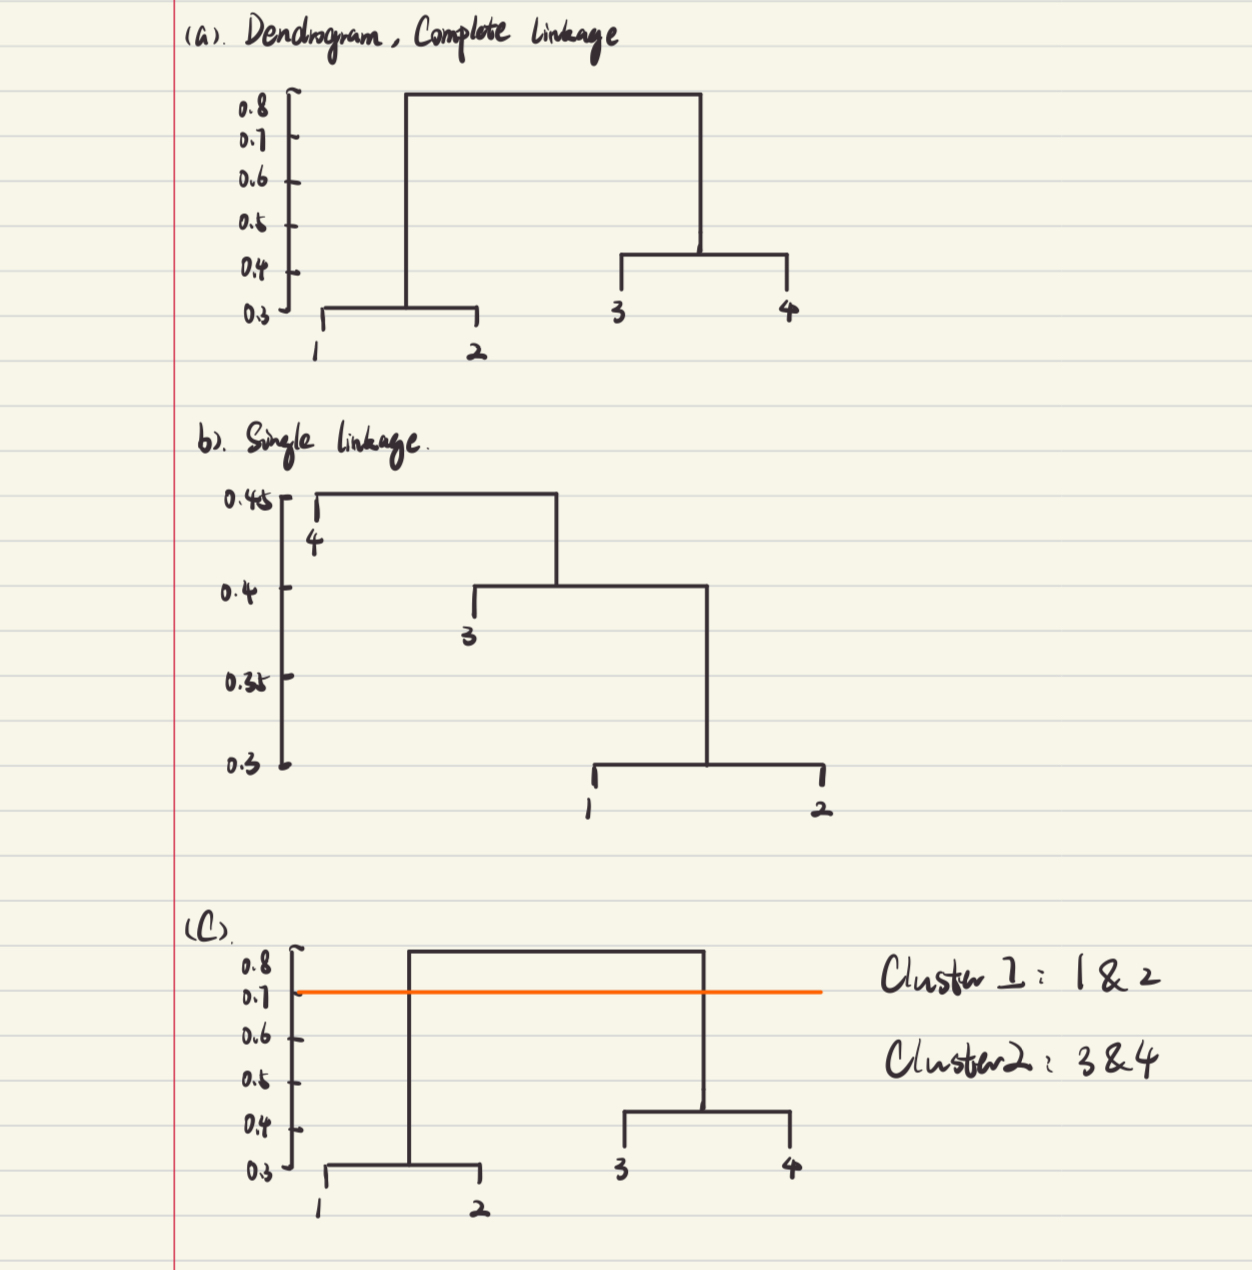

In [236]:
Image("./ABC.jpg")

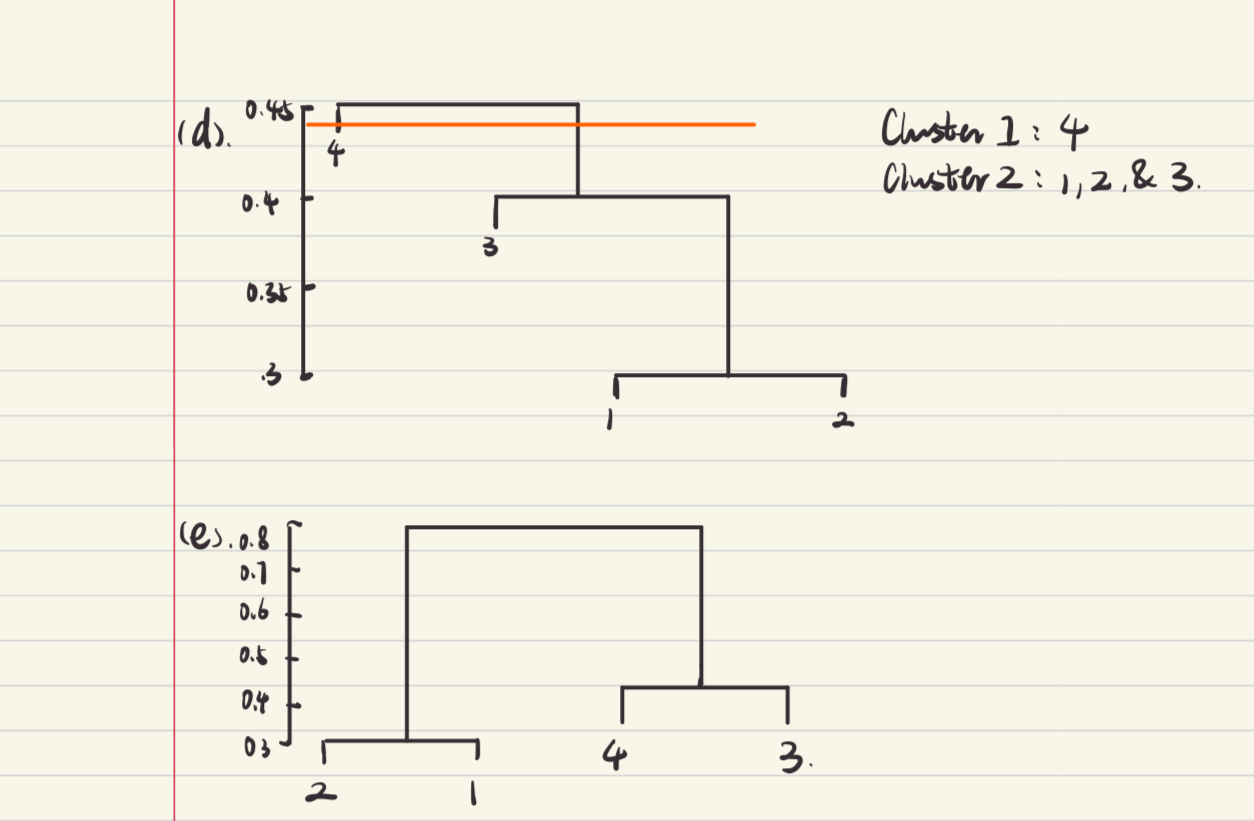

In [237]:
Image("./DE.jpg")